# ***Sarcasm Detection***

## **Data Gathering**

In [ ]:
# !wget 'https://www.dropbox.com/s/wcr2fjyt4ewk184/Sarcasm_Headlines_Dataset.json'

In [ ]:
#Importing required packages...
import json
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)      #Reading the data...

## **Exploratory Data Analysis (EDA)**

In [ ]:
data.head()             #Viewing the top 5 rows of the data i.e, having a glance at the data...

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
data['headline'][4]

"mother comes pretty close to using word 'streaming' correctly"

In [ ]:
data.shape      #Checking the shape of the data

(28619, 3)

***Missing value Analysis***

In [ ]:
#Lets verify if our data has any Missing values..
data.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

From above, we see that the data has no missing values..

In [ ]:
#Importing the required packages..
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Target Evaluation')

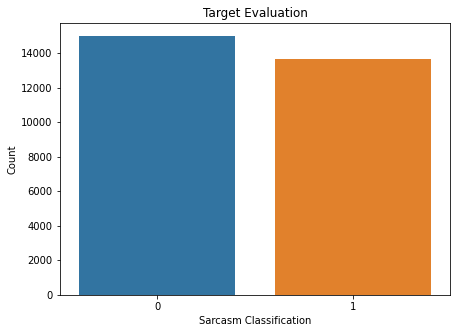

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='is_sarcastic', data=data)
plt.xlabel('Sarcasm Classification')
plt.ylabel('Count')
plt.title('Target Evaluation')

From above we see that the data is quite balanced

In [ ]:
#We would be considering "News_Headline" to build a text classification model for predicting News Headline as sarcastic or not.
X = data['headline']
Y = data['is_sarcastic']

**Visualizing top words 200 frequent words using WordCloud**

In [ ]:
#Importing required packages...
from wordcloud import WordCloud, STOPWORDS

In [ ]:
wordcloud = WordCloud(background_color='black', stopwords= STOPWORDS, max_words= 200,
                      max_font_size=100, random_state=100, width=700, height=500)

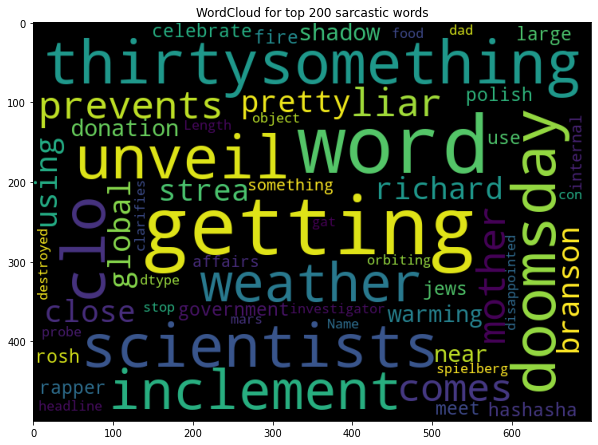

In [ ]:
plt.figure(figsize=(10,8))
wordcloud.generate(str(data.loc[data['is_sarcastic']==1, 'headline']))
plt.title('WordCloud for top 200 sarcastic words')
plt.imshow(wordcloud)

## **Data Cleansing and Preprocessing**

**As we can see that our data has text in it, hence we will convert the data into Machine algorithm understandable way.**

In [ ]:
#Importing required packages...
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import nltk
import re

# nltk.download('stopwords')
# nltk.download('punkt')

In [ ]:
headlines = X.copy()
headlines[0]

'thirtysomething scientists unveil doomsday clock of hair loss'

In [ ]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(headlines)):
  hline = re.sub('[^a-zA-Z]', ' ', headlines[i])
  hline = ' '.join([ps.stem(word) for word in hline.lower().split() if word not in stopwords.words('english')])
  corpus.append(hline)

In [ ]:
corpus[0:10]

['thirtysometh scientist unveil doomsday clock hair loss',
 'dem rep total nail congress fall short gender racial equal',
 'eat veggi delici differ recip',
 'inclement weather prevent liar get work',
 'mother come pretti close use word stream correctli',
 'white inherit',
 'way file tax less stress',
 'richard branson global warm donat nearli much cost fail balloon trip',
 'shadow govern get larg meet marriott confer room b',
 'lot parent know scenario']

### **Visualizing top words 50 frequent words using WordCloud**

We have remove the most common words such as "and", "for", "is", etc and then have created a new DataFrame to visualize the top 50 sarcastic and Non-sarcastic words as below:

In [ ]:
df = pd.concat([pd.DataFrame(corpus, columns=['headline']), Y], axis=1)
df.head()

,headline,is_sarcastic
0,thirtysometh scientist unveil doomsday clock h...,1
1,dem rep total nail congress fall short gender ...,0
2,eat veggi delici differ recip,0
3,inclement weather prevent liar get work,1
4,mother come pretti close use word stream corre...,1


In [ ]:
wordcloud_50 = WordCloud(background_color='black', stopwords= STOPWORDS, max_words= 50,
                      max_font_size=100, random_state=100, width=700, height=500)

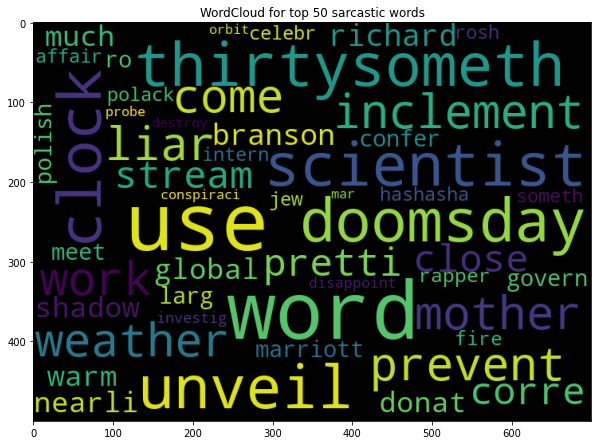

In [ ]:
plt.figure(figsize=(10,8))
wordcloud_50.generate(str(df.loc[df['is_sarcastic']==1, 'headline']))
plt.title('WordCloud for top 50 sarcastic words')
plt.imshow(wordcloud_50)

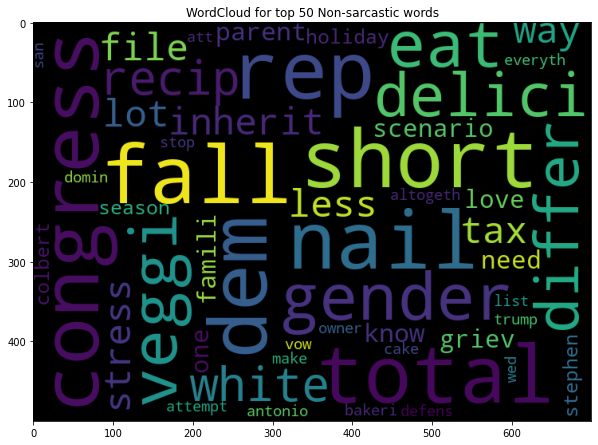

In [ ]:
plt.figure(figsize=(10,8))
wordcloud_50.generate(str(df.loc[df['is_sarcastic']==0, 'headline']))
plt.title('WordCloud for top 50 Non-sarcastic words')
plt.imshow(wordcloud_50)

From above we see that we have removed unneccesary characters if there are any and also unwanted most common words from the column and left with words which are PorterStemmed. 

Now we will transform these texts into numbers using CountVectorizer as below:

In [ ]:
#Importing the required packages...
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Now we are ready to build the model on top of the transformed variable using our target variable.**

## **Model Building**

As we can see that our target varible here is to predcit whether the news is sarcastic or not. So this becomes a classification problem, hence we would be using Logistic Regression first and then would go ahead with other models which gives better performance.

### **Logistic Regression:**

In [ ]:
#Importing required packages...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
lr = LogisticRegression()

In [ ]:
Y = df['is_sarcastic']

**Splitting the data into Train and Test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=200)

In [ ]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = lr.predict(X_test) 

In [ ]:
cm= confusion_matrix(Y_test, Y_pred)
cm

array([[2470,  527],
       [ 674, 2053]])

***Logistic Regression metrics:***

In [ ]:
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('ROC_AUC score is', roc_auc_score(Y_test, Y_pred))
print('Precision score is:', precision_score(Y_test, Y_pred))
print('Recall score is:', recall_score(Y_test, Y_pred))

Accuracy is: 0.7901816911250874
ROC_AUC score is 0.7884997208429552
Precision score is: 0.7957364341085271
Recall score is: 0.7528419508617529


### **GaussianNB:**

In [ ]:
#Importing required packages...
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = gnb.predict(X_test)

In [ ]:
cm= confusion_matrix(Y_test, Y_pred)
cm

array([[2646,  351],
       [1588, 1139]])

***GaussiaNB metrics:***

In [ ]:
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('ROC_AUC score is', roc_auc_score(Y_test, Y_pred))
print('Precision score is:', precision_score(Y_test, Y_pred))
print('Recall score is:', recall_score(Y_test, Y_pred))

Accuracy is: 0.6612508735150244
ROC_AUC score is 0.6502789918631502
Precision score is: 0.7644295302013423
Recall score is: 0.4176751008434177


### **Support Vectors Machines (SVM):**

In [ ]:
#Importing required packages...
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC()

In [ ]:
lsvc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
Y_pred = lsvc.predict(X_test)

In [ ]:
cm= confusion_matrix(Y_test, Y_pred)
cm

array([[2419,  578],
       [ 693, 2034]])

***LinearSVC metrics:***

In [ ]:
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('ROC_AUC score is', roc_auc_score(Y_test, Y_pred))
print('Precision score is:', precision_score(Y_test, Y_pred))
print('Recall score is:', recall_score(Y_test, Y_pred))

Accuracy is: 0.7779524807826694
ROC_AUC score is 0.7765075306329431
Precision score is: 0.7787136294027565
Recall score is: 0.7458745874587459


### **RandomForest:**

In [ ]:
#Importing required packages..
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = rf.predict(X_test)

In [ ]:
cm= confusion_matrix(Y_test, Y_pred)
cm

array([[2578,  419],
       [ 991, 1736]])

In [ ]:
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('ROC_AUC score is', roc_auc_score(Y_test, Y_pred))
print('Precision score is:', precision_score(Y_test, Y_pred))
print('Recall score is:', recall_score(Y_test, Y_pred))

Accuracy is: 0.7536687631027253
ROC_AUC score is 0.748395259946415
Precision score is: 0.8055684454756381
Recall score is: 0.6365969930326366


**Important Notes:**
We have tried with different types of algorithms starting with LogisticRegression to RandomForest.
1.   The base model Logistic Regression performed well out of all the other tried algorithms with accuracy of **~79%** and ROC-AUC score of **~78%** which is a good model.
2.   Next we went with Naive Bayes model because of the following reasons:
          *  It's simple and easy to implement.
          *  It doesn't require much training dataset.
          *  It is fast and can be used to make real-time predictions.
          *  When assumption of independent predictor holds true, Naive Bayes
             performs better as compared to other models.
    But we see that the accuracy of GaussianNB was **~66%** with ROC-AUC score of **~65%**
3.   Then we implemented Support Vector Machines(SVM) model because of the following reasons:
          *  SVM works relatively well when there is clear margin of separation 
             between classes.
          *  SVM is relatively memory efficient.
    Here Linear SVM performed quite but less efficient than Logistic Regression with accuracy of **~77%** and ROC-AUC score of **~77%**
4.   Later we tried with Random Forest because of the following reasons:
          *  increases predictive power of the algorithm and also helps prevent 
             overfitting.
          *  It is also one of the most used algorithms, because of its 
             simplicity and diversity.
    Here Random Forest performed quite less compared to Logistic Regression and Linear SVM with accuracy of **~75%** and with ROC-AUC score of **~74%**.


***Conclusion:***
From the above observation, we can clearly see that Logistic Regression performs better than all the other tried algorithms. Hence we will be building our entire model using Logistic Regression.

### **Building Model on entire Dataset using Logistic Regression**

In [ ]:
lr.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
def predict_sarcasm(sample_newsHeadLine):
  sample_newsHeadLine = re.sub('[^a-zA-Z]', ' ', sample_newsHeadLine)
  sample_newsHeadLine = ' '.join([ps.stem(word) for word in sample_newsHeadLine.lower().split() if word not in stopwords.words('english')])
  temp = cv.transform([sample_newsHeadLine]).toarray()
  predicted = lr.predict(temp)
  if predicted==1:
    print('Alert!, The news headline contains sacarsm...')
  else:
    print('This is a normal news headline...')

In [ ]:
sample_newsHeadLine_10 = 'this lesbian is considered a father in indiana (and an amazing one at that)'
sample_newsHeadLine_15 = 'uber ceo travis kalanick stepping down from trump economic advisory council'
sample_newsHeadLine_4 = 'mother comes pretty close to using word "streaming" correctly'

***Predicting on sample data..***

In [ ]:
predict_sarcasm(sample_newsHeadLine_10) # This is a normal news headline...
predict_sarcasm(sample_newsHeadLine_15) # This is a normal news headline...
predict_sarcasm(sample_newsHeadLine_4)  # Alert!, The news headline contains sacarsm...

This is a normal news headline...
This is a normal news headline...
Alert!, The news headline contains sacarsm...
